This notebook is intended to be a brief introduction to Fourier Transforms, covering some of the theory of Fourier analysis as well as how to use the Fourier transform tools provided by `numpy`.

**Note**: This notebook is still a work in progress. Most things in here *should* be accurate, but may not yet be complete. If anything seems fishy to you, then I urge you to check independent sources and perform tests/calculations of your own. (In fact, I recommend you perform further tests and calculations on your own&mdash;it's a great way to learn the material!)

In [1]:
# Put the imports up here for easy reference.
import numpy as np
import matplotlib.pyplot as plt

# Set some of the default parameters for figures.
plt.rcParams["figure.figsize"] = (7,4)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 12

# Introduction

Rather than painstakingly derive the complex Fourier transform by first introducing the sine and cosine transforms (which can be found in many texts covering the subject), I would like to more-or-less jump straight into the thick of things. If you would like a more detailed derivation and justification of the basics of Fourier analysis, then I recommend you choose your favorite text on mathematical methods (for physics or otherwise) and refer to its discussion of Fourier analysis.

I'll start by noting that the family of complex exponentials form a complete basis for the space of (periodic) functions, meaning we can write

$$
    f(x) = \sum_{n=-\infty}^\infty c_n {\rm e}^{ink_0 x}. 
$$


Each complex exponential in the sum, ${\rm e}^{ink_0 x}$, is referred to a *Fourier mode* with frequency $nk_0$. The *amplitude* of the $n$-th Fourier mode is then $c_n$. The sum as a whole is called a *Fourier series*, and the term $k_0$ is referred to as the fundamental frequency or fundamental mode. The interpretation of the above equation is that we may write any function as a weighted sum of harmonics of a fundamental oscillatory mode. It is worth noting that formally this is not true for a general function $f(x)$, but rather we require that the function be periodic; however, physicists tend to be very cavalier with this and do not check that the necessary conditions are satisfied before using Fourier series (or Fourier transforms, which we'll get to in a bit). We have good reason to do this, though: most physical fields tend to zero far enough from some reference, so we can treat these functions as having an infinite period.

At this point, it would be natural to wonder how one would calculate the coefficients of the series&mdash;after all, what good is a series representation if you don't know its coefficients? In order to answer this, let's first calculate the following integral:

$$
    I = \int_0^{2\pi/k_0} {\rm e}^{i(n-m)k_0 x} dx,
$$

where $n$ and $m$ are both integers. Substituting $u = k_0 x / 2\pi$ recasts the integral as

$$
    I = \frac{2\pi}{k_0} \int_0^1 {\rm e}^{i2\pi(n-m)u} du,
$$

which we can solve by considering two cases. First, if $n = m$, the argument of the exponential vanishes and so our integral just evaluates to $2\pi/k_0$. The other case, $n \neq m$ evaluates to

$$
    I = \frac{1}{ik_0(n-m)} \biggl[ {\rm e}^{i2\pi(n-m)} - 1\biggr].
$$

Since $n$ and $m$ are both integers, $n-m$ is also an integer and so the integral vanishes. We can summarize this nicely with the *Kronecker delta*, which is defined as

$$
    \delta_{ij} = 
    \begin{cases}
        1, i = j \\
        0, i \neq j
    \end{cases}.
$$

Using this, our integral can be written as

$$
    I = \frac{2\pi}{k_0} \delta_{mn}.
$$

We can use this result to calculate the coefficients of the Fourier series like so:

$$
    \int_0^{2\pi/k_0} f(x) {\rm e}^{-imk_0 x} dx = \sum_{n=-\infty}^\infty c_n \int_0^{2\pi/k_0} {\rm e}^{i(n-m)k_0x} dx.
$$

We already calculated the integral under the sum, so we get

$$
    \int_0^{2\pi/k_0} f(x) {\rm e}^{-imk_0 x} = \frac{2\pi}{k_0} \sum_{n=-\infty}^\infty c_n \delta_{mn}.
$$

Since $\delta_{mn}$ is zero everywhere except $m = n$, only $c_m$ survives the summation. So the coefficients in the Fourier series can be calculated as

$$
    c_n = \frac{k_0}{2\pi} \int_0^{2\pi/k_0} f(x) {\rm e}^{-ink_0 x} dx.
$$

It is worthwhile to take a moment to interpret this result. This expression for the coefficients in the Fourier series tells us that each Fourier mode has an amplitude given by the average of the function it is representing, weighted by the corresponding mode, on one period of the fundamental mode. It then follows that the zeroth Fourier mode gives us the average of the function on one period of the fundamental mode. Additionally, we may conclude that if $f$ is an even function, then the coefficients of its Fourier series must be real-valued. Similarly, if $f$ is an odd function, then the coefficients of its Fourier series must be purely imaginary. (If this isn't obvious to you, then it is worthwhile thinking about how the complex exponential is related to sine and cosine.)

In [2]:
# Let's look at a quick example.
base_freq = 20
x = np.linspace(-1, 1, 2001)
freqs = np.fft.fftshift(  # Make the output frequencies increase monotonically
    np.fft.fftfreq(  # Calculate the frequencies in the FFT
        x.size, d=np.mean(np.diff(x))
    )
)
y_even = x ** 2 #np.cos(2 * np.pi * base_freq * x)
y_odd = x ** 3 #-np.sin(2 * np.pi * base_freq * x)
y_even_fft = np.fft.fftshift(np.fft.fft(y_even))
y_odd_fft = np.fft.fftshift(np.fft.fft(y_odd))

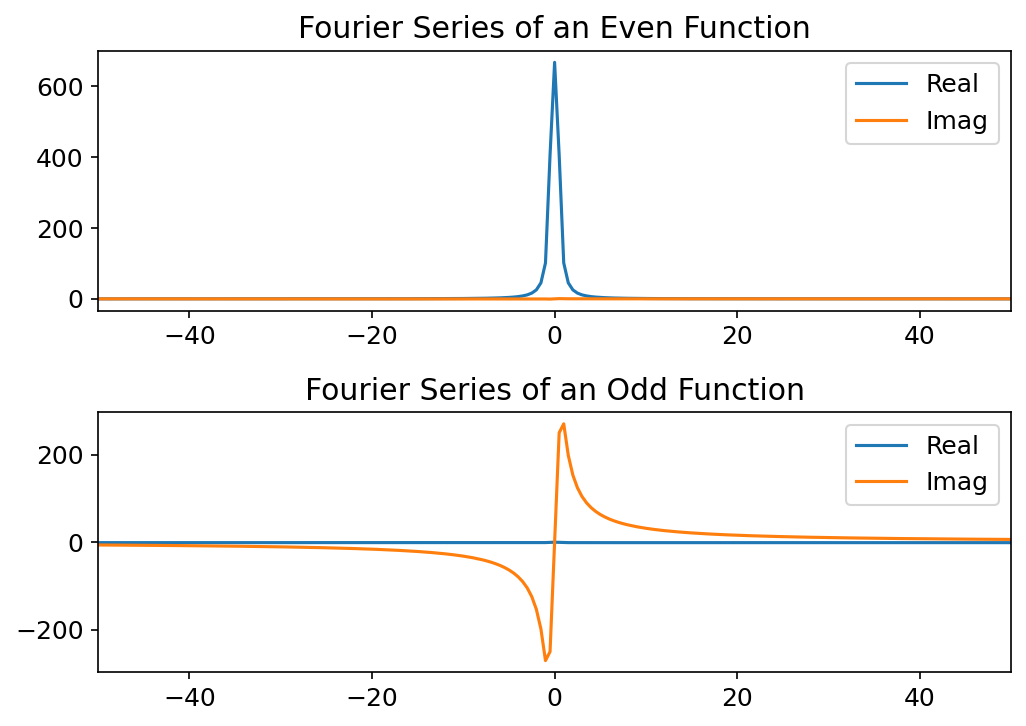

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7,5))
axes[0].set_title("Fourier Series of an Even Function")
axes[1].set_title("Fourier Series of an Odd Function")
axes[0].plot(freqs, y_even_fft.real, label="Real")
axes[0].plot(freqs, y_even_fft.imag, label="Imag")
axes[1].plot(freqs, y_odd_fft.real, label="Real")
axes[1].plot(freqs, y_odd_fft.imag, label="Imag")
for ax in axes:
    ax.legend()
    ax.set_xlim(-50, 50)
fig.tight_layout();

# The Fourier Transform

In the previous section, we saw that (properly behaved) functions can be expressed as a linear combination of complex exponentials (or sines and cosines). This suggests that rather than think about a function on the domain we measure it on, we can think about it in the Fourier domain: a domain that is dual to the original domain, which tells us about the harmonic content of the function. In other words, rather than describe the function by specifying its value at various points on its original domain, we can describe it by specifying the amplitude (and phase) of each of its Fourier modes. As a concrete (yet simple) example, consider a sine wave with a period of 10 ms. Instead of characterizing it by saying that it has a period of 10 ms (which is describing it in the time domain), we can characterize it by saying that it has a frequency of 100 Hz (which is describing it in the frequency domain&mdash;the Fourier dual to the time domain).

Before moving on, it is important to take a moment to think carefully about what was presented in the previous section and the claims made at the beginning of this section. The function we considered was assumed to be continuous, but its Fourier representation was discrete&mdash;is this really okay? I won't get into the details, but its validity can be motivated by thinking about the Taylor series expansion of a function: that is another case where we can encode information about a function (around a point) with a discrete set of numbers, namely the coefficients of the Taylor expansion. That said, there are some contexts where we are actually interested a continuous description of the Fourier content of a function (for example, this is a tool often employed in perturbation analyses of fluids). We just do the usual trick of converting the sum to an integral, but with a bit of extra care taken when writing down the measure:

$$
    f(x) = \int_\mathbb{R} \tilde{f}(k) {\rm e}^{ikx} \frac{dk}{2\pi}.
$$

In the above equation, $\tilde{f}(k)$ (or sometimes the entire integral&mdash;this is a bit of an unfortunate ambiguity due to different ways of colloquially talking about Fourier transforms) is referred to as the *Fourier transform* of $f(x)$. Conversely, $f(x)$ is referred to as the *inverse Fourier transform* of $\tilde{f}(k)$. If we assert that the Dirac delta, $\delta(x)$, is defined so that

$$
    \delta(x) = \int_{-a}^a {\rm e}^{i2\pi\xi x} d\xi,
$$

then we have the following expression for $\tilde{f}(k)$:

$$
    \tilde{f}(k) = \int_\mathbb{R} f(x) {\rm e}^{-ikx} dx.
$$

(I'll leave this as an exercise for you to prove, with the additional hint that a property of the Dirac delta is $\int_\mathbb{R} \delta(x) f(x) dx = f(0)$.)
  
Notice that the expression for $\tilde{f}(k)$ is the continuous analog of the expression for the Fourier coefficients $c_n$. In fact, one can choose to classify Fourier transforms by the continuity of the two domains involved&mdash;the original domain and the Fourier domain&mdash;though we usually use "Fourier transform" to refer to the continuous case and use "discrete Fourier transform" (or DFT) to refer to the discrete case. (In a physics context, we usually don't fret about this, but there are applications where it is important to think carefully about whether the input space is continuous or discrete and whether the output space is continuous or discrete.) Unfortunately, people often just say "Fourier transform", and the type that is used needs to be inferred from the context, though it should (hopefully) be obvious which is implied.

## Normalization and Conventions

At this point, you might be wondering why the factor of $2\pi$ appeared in the expression for the inverse Fourier transform. This is a consequence of having introduced the Fourier transform using *angular frequencies* and requiring that the Fourier transform is appropriately inverted by applying the inverse Fourier transform to it. That is, if $\mathcal{F}[f]$ is the Fourier transform of $f$, then the factor of $2\pi$ is necessary to ensure that

$$
    f(x) = \mathcal{F}^{-1}\bigl[\mathcal{F}[f]\bigr].
$$

It is worthwhile to work through this exercise&mdash;in an attempt to minimize confusion (but not do too much hand-holding), I'll make it clear that the notation used above means $\tilde{f}(k) = \mathcal{F}\bigl[f(x)\bigr]$.
  
It is worth noting that the choice of where to place the factor of $2\pi$ (in the Fourier transform or its inverse) is arbitrary; however, it is physically well-motivated to place it in the integral over Fourier modes. This is perhaps most clearly motivated by thinking about a function defined on the time domain, as well as its Fourier representation. Using this formalism, one would write the Fourier transform of the signal $f(t)$ as

$$
    \tilde{f}(\omega) = \int_\mathbb{R} f(t){\rm e}^{-i\omega t} dt.
$$

Then it makes sense to interpret $\omega$ as the *angular* frequency of each Fourier mode, related to the "ordinary" frequency $\nu$ via $\omega = 2\pi\nu$. So, even though we could put the factor of $(2\pi)^{-1}$ in the either integral (or put a factor of $(2\pi)^{-1/2}$ in each integral), it makes good physical sense to put it in the integral over the Fourier modes.

# Applications

All that said, we could avoid this issue entirely by instead defining the Fourier transform as

$$
    \tilde{f}(\nu) = \int_\mathbb{R} f(t) {\rm e}^{-i2\pi\nu t} dt,
$$

and the inverse Fourier transform as

$$
    f(t) = \int_\mathbb{R} \tilde{f}(\nu) {\rm e}^{i2\pi\nu t} d\nu.
$$

This is perfectly valid, and is what I would often recommend, though it is helpful to be familiar enough with both conventions to be able to switch between them effortlessly, since the convention used varies between applications. Applications in theoretical physics often use the convention of expressing the Fourier content in terms of wave vectors or angular frequencies (which I think is mainly because it's less writing to do so), while applications in experimental or engineering contexts might employ the convention used immediately above (since the experiments typically collect data in the time-domain and have some interest in the Fourier content in terms of ordinary frequencies).

## Simple Theoretical Example

As a quick example in a theoretical context, consider the wave equation in one dimension:

$$
    \frac{\partial^2 f}{\partial x^2} = \frac{1}{v^2} \frac{\partial^2 f}{\partial t^2}.
$$

We can easily recover the dispersion relation for this wave by writing $f$ in the Fourier domain, where the derivatives act only on the exponential terms. This gives a dispersion relation of

$$
    \omega^2 = k^2 v^2,
$$

which you should verify yourself. Though this is a simple example (there aren't any dispersive interactions with the field, nor are there any forcing terms), it should be a decent motivator for how useful Fourier analysis can be in theoretical work, where we often care about how a wave is dispersed in a medium (or more generally how excitations of a field propagate through the space the field is defined on). Should you ever venture into the realm of particle physics, quantum field theory, or fluid mechanics, you'll see Fourier transforms used extensively&mdash;it really is often much easier to analyze a system in the Fourier domain.

## In Radio Astronomy

Fourier transforms also crop up frequently in the context of radio astronomy and cosmology. In a cosmological context, you'll often see discussions about properties of various fields of interest (e.g. the matter density field) described in terms of their Fourier content, since this naturally tells us about the typical sizes of structures. For example, the 21-cm power spectrum measures the covariance between Fourier modes of fluctuations in the 21-cm brightness temperature:

$$
    \bigl\langle \delta\tilde{T}(\mathbf{k}_1) \delta \tilde{T}(\mathbf{k}_2) \bigr\rangle = (2\pi)^3 \delta^D(\mathbf{k}_1 - \mathbf{k}_2) P_{21{\rm cm}}(\mathbf{k}_1)
$$

In a more experimental context, radio interferometers actually measure the Fourier transform of the sky by taking the cross-correlation of the signal measured by two different antennas. A radio interferometer measures a *visibility*, defined as

$$
    V_{pq}(\nu, \mathbf{b}_{pq}) = \int A_\nu(\hat{\mathbf{n}}) I_\nu(\hat{\mathbf{n}}) \mathrm{e}^{-i2\pi\nu\mathbf{b}_{pq} \cdot \hat{\mathbf{n}} / c} d\Omega,
$$

where $p, q$ are indices that correspond to the two antennas that form the baseline $\mathbf{b}_{pq} = \mathbf{x}_q - \mathbf{x}_p$. $A_\nu(\hat{\mathbf{n}})$ is called the *primary beam*, and it measures the fraction of power picked up by the antennas in the direction $\hat{\mathbf{n}}$; this is often *peak-normalized* so that the maximum is unity. $I_\nu(\hat{\mathbf{n}})$ is the specific intensity on the sky, which (roughly) is a measure of how bright the sky is in a particular direction at a particular frequency. To be clear, $\nu$ corresponds to the observed frequency, and $c$ is the speed of light in vacuum. Since $\lambda = c / \nu$, we can instead express the baseline in units of wavelengths: $\mathbf{u} \equiv \mathbf{b} / \lambda$. Using this notation, it becomes clear that the visibility is actually the Fourier transform of the (beam-weighted) sky intensity, and that the baseline specifies which Fourier mode is probed at a particular frequency:

$$
    V_{pq}(\mathbf{u}) = \int A_\nu(\hat{\mathbf{n}}) I_\nu(\hat{\mathbf{n}}) \mathrm{e}^{-i2\pi\mathbf{u}\cdot\hat{\mathbf{n}}} d\Omega.
$$

I should point out that the Fourier transform interpretation is really only valid for baselines that are short enough so that the curvature of the sky can be ignored and it is OK to approximate the sky as a plane. If you'd like to learn more about radio interferometry, then a great tutorial is provided by the National Radio Astronomy Observatory (NRAO).

## The Convolution Theorem

< fill this out later >

# Examples

The previous section was not meant to be complete in any way, but rather briefly show some scenarios where Fourier transforms appear. Rather than give a complete lesson on Fourier transforms, this notebook is intended to provide a basic introduction and provide some worked examples of performing Fourier transforms using `numpy`. So, without further ado, let's get to some examples.

## Proof of Concept: Pure Tones

This first example serves more as a proof-of-concept regarding how the Fourier transform extracts the harmonic information of a function. We'll first look at a sine wave and show that the Fourier transform is (roughly) a delta function at the frequency of the sine wave.

In [4]:
times = np.linspace(-1, 1, 1001)  # Use [-1,1] seconds as time domain
dt = np.mean(np.diff(times))
freq = 50  # Hz
func = np.sin(2 * np.pi * freq * times)
func_ft = np.fft.fft(func) * dt  # Get the units right
freqs = np.fft.fftfreq(times.size, dt)

### Aside: FFT Peculiarities

Before looking at the Fast Fourier Transform (FFT) output, I'd like to point out some oddities with how the output of the `numpy.fft.fft` function is arranged. The output is arranged so that the first half of the array corresponds to the positive frequency modes (in increasing order), and the second half corresponds to the negative frequency modes (also in increasing order). Here's a quick visualization:

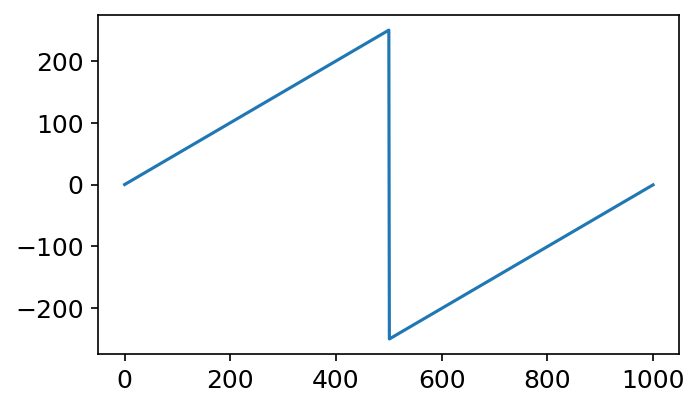

In [5]:
# The fftfreq function also follows this convention
plt.figure(figsize=(5,3))
plt.plot(freqs)

Fortunately, `numpy` offers a convenience function for sorting the data so that the corresponding frequencies are monotonically increasing. This is achieved with the `fftshift` function, like so:

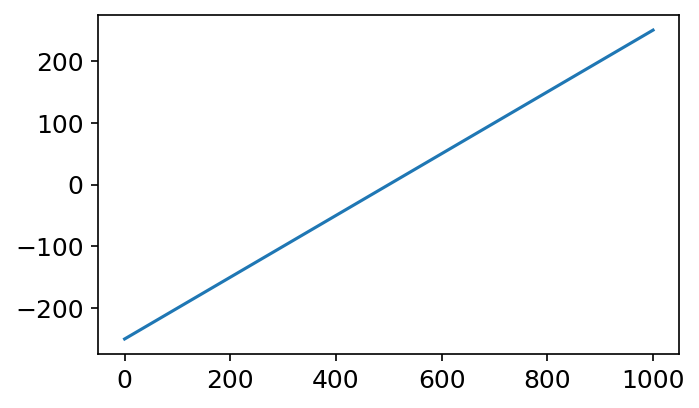

In [6]:
plt.figure(figsize=(5,3))
plt.plot(np.fft.fftshift(freqs));

So, it's usually a good idea to get the shifts sorted out before attempting to plot any Fourier transforms. Now that that's out of the way, let's look at the FFT we calculated earlier.

In [7]:
func_ft = np.fft.fftshift(func_ft)
freqs = np.fft.fftshift(freqs)

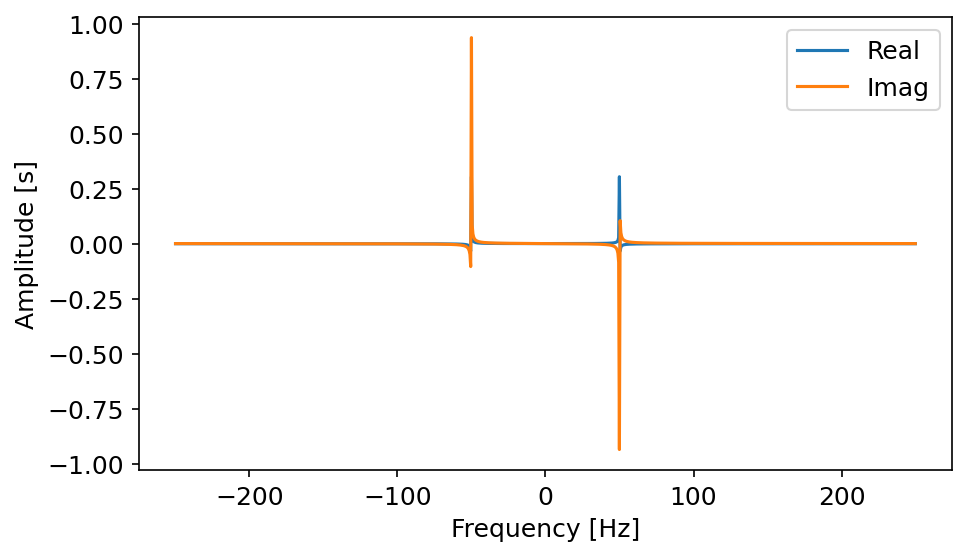

In [8]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Amplitude [s]")
ax.plot(freqs, func_ft.real, label="Real")
ax.plot(freqs, func_ft.imag, label="Imag")
ax.legend();

So, the Fourier transform of our sine wave has a negative spike at 50 Hz and a positive spike at -50 Hz, with both of these spikes occurring in the imaginary component of the Fourier coefficients. This is roughly what we would expect, though the sign is flipped, and there also seems to be some leakage into the real components of the coefficients. What's going on here? Well, let's try to answer this by first looking at the function we're transforming.

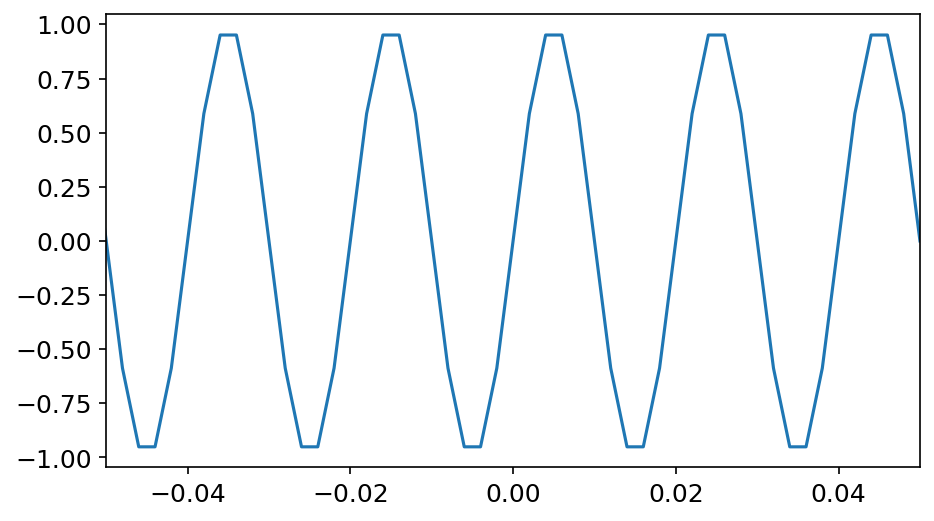

In [9]:
plt.plot(times, func)
plt.xlim(-0.05, 0.05);

You'll notice that this isn't actually a smooth function&mdash;we didn't have enough samples for the given frequency to smoothly resolve the peaks. Let's now test a new function that is better sampled and see if the FFT looks better.

In [10]:
new_freq = 10  # Hz
new_func = np.sin(2 * np.pi * new_freq * times) * dt
new_func_ft = np.fft.fftshift(np.fft.fft(new_func))

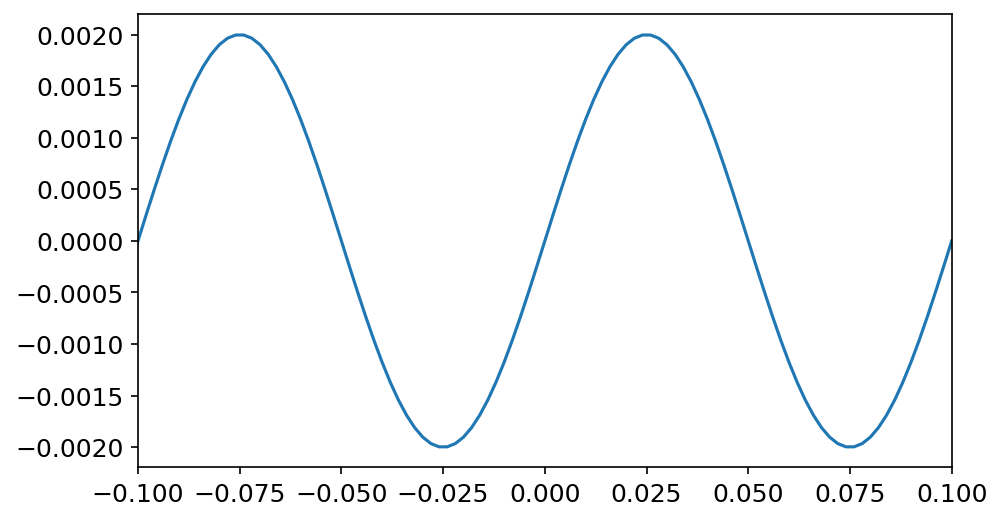

In [11]:
# First, let's make sure we're resolving the peaks
plt.plot(times, new_func)
plt.xlim(-0.1, 0.1);

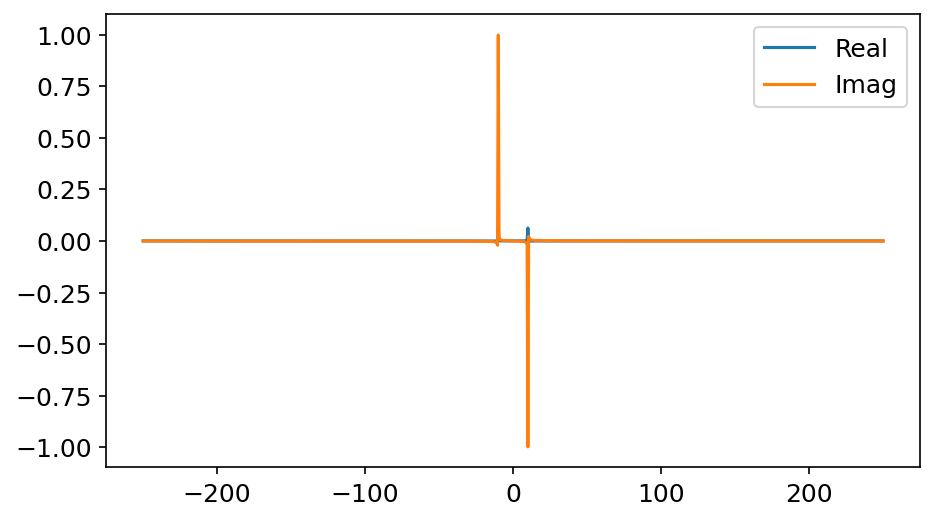

In [12]:
# Now let's look at the FFT
plt.plot(freqs, new_func_ft.real, label="Real")
plt.plot(freqs, new_func_ft.imag, label="Imag")
plt.legend();

Great! Now the spikes are much sharper, and there is much less power in the real part of the spectrum. There's still the issue of the conjugation. Let's investigate.

In [13]:
# Try defining the function in Fourier space, then take the inverse transform.
alt_freqs = np.fft.fftfreq(times.size, dt)
df = 1 / (times[-1] - times[0])  # This is our expected frequency resolution
test_spec = np.zeros_like(new_func_ft)
# A sine wave has a positive (imaginary) peak at the positive frequency
test_spec[np.isclose(alt_freqs, new_freq, atol=0.5*df, rtol=0)] = 1j
# and a negative peak at the negative frequency
test_spec[np.isclose(alt_freqs, -new_freq, atol=0.5*df, rtol=0)] = -1j
test_func = np.fft.ifft(test_spec)

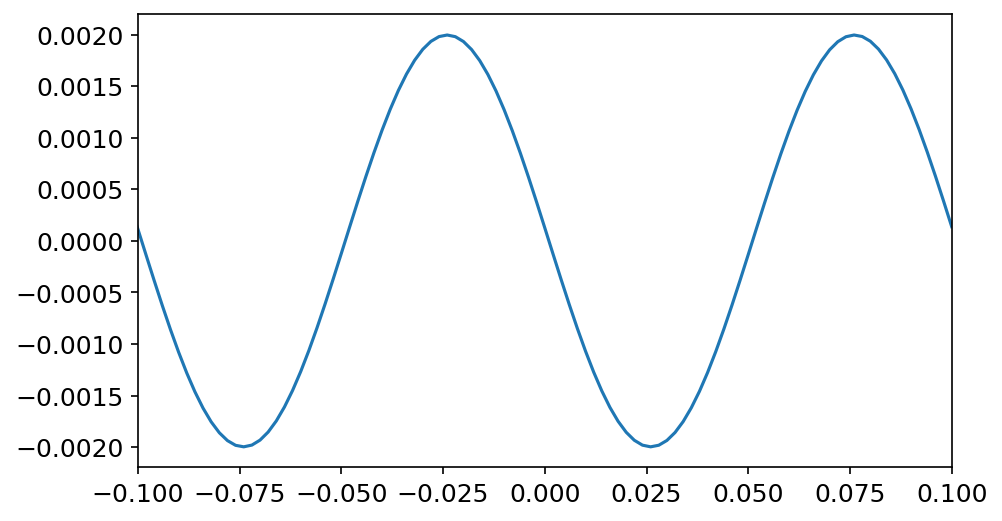

In [14]:
plt.plot(times, test_func.real)
plt.xlim(-0.1, 0.1);

Aha! So we've just confirmed that the convention used by `numpy` is opposite the convention introduced at the beginning of this notebook. Indeed, you can inspect the implementation documentation (just do `np.fft?` in an empty cell) to confirm that this is the case (you'll need to scroll down a bit). Now, if you care about the absolute phase information in any sense, this is an important feature to be aware of. However, we often only care about the amplitude of our signal and the phase relative to some reference, so this detail often gets ignored. Note that in order to map positive frequencies to negative frequencies (and vice-versa), we just do a complex conjugation, so the phases should work out correctly if you just hit the result with a complex conjugation.

To wrap up this example, let's now look at what happens when we take the FFT of a cosine.

In [15]:
func = np.cos(2 * np.pi * freq * times)
func_ft = np.fft.fftshift(np.fft.fft(func)) * dt

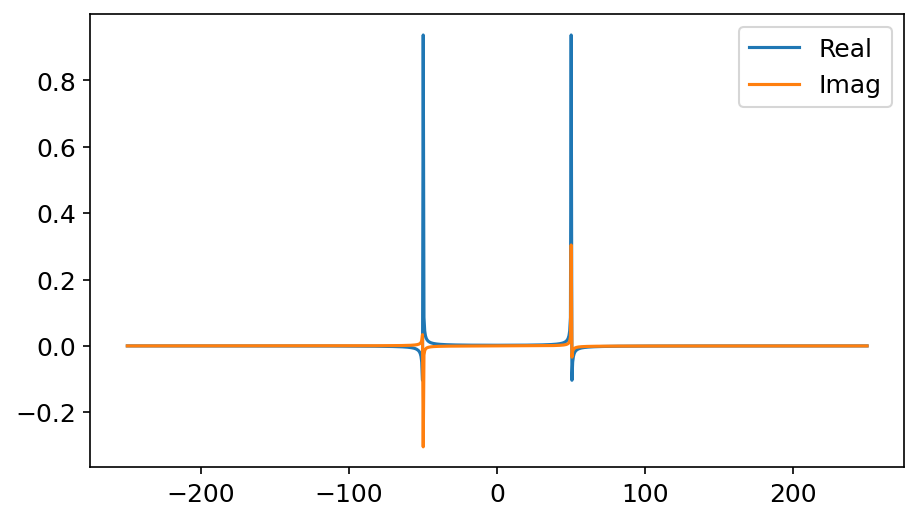

In [16]:
plt.plot(freqs, func_ft.real, label="Real")
plt.plot(freqs, func_ft.imag, label="Imag")
plt.legend();

This is more-or-less what we should expect: two spikes in the real part of the spectrum, located at the positive and negative frequencies of our input signal.

## Top Hat and the Sinc Function

For this next example, we'll be investigating the Fourier transform of the top-hat function, which is constant on some interval and zero everywhere else.

< add some equations/text going over what we expect the result to be >

In [17]:
freq = 10  # Hz
times = np.linspace(-1, 1, 10000)
dt = np.mean(np.diff(times))
freqs = np.fft.fftshift(np.fft.fftfreq(times.size, dt))
top_hat = np.zeros_like(times)
half_width = 0.1
top_hat[np.abs(times) < half_width] = 1
#top_hat /= np.sum(top_hat)

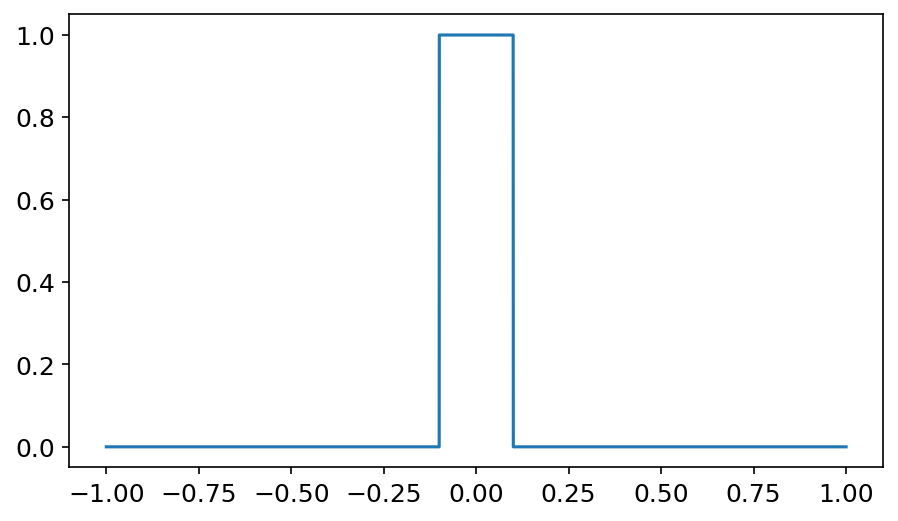

In [18]:
# Let's take a look
plt.plot(times, top_hat);

In [19]:
top_hat_ft = np.fft.fftshift(np.fft.fft(top_hat)) * dt

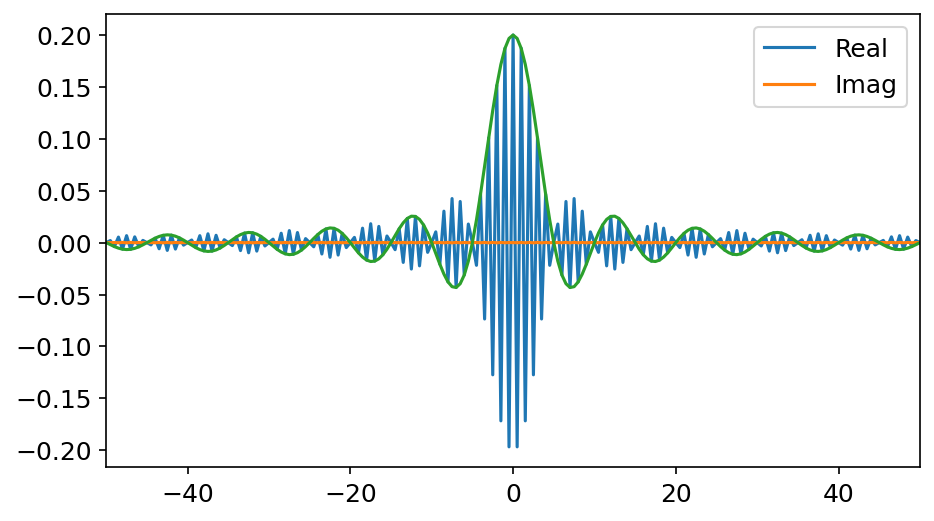

In [25]:
plt.plot(freqs, top_hat_ft.real, label="Real")
plt.plot(freqs, top_hat_ft.imag, label="Imag")
plt.plot(freqs, np.sinc(half_width * freqs * 2) * 2 * np.mean(top_hat))
plt.legend()
plt.xlim(-50,50);

## Nyquist Theorem, Sampling, and Aliasing

## Gaussians and the Uncertainty Principle

## Circular Top Hat and the Airy Disk

## Sidelobes and Window Functions